In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
filepath = ('C:/Users/USER/Desktop/coursera/python/data for dl project/bootstrapped data.csv')
data =pd.read_csv(filepath)
X = data.iloc[0:1400,:-1]
y = data.iloc[0:1400,-1]
X.shape
print(X.shape)
print(y.shape)

(1400, 15)
(1400,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(15, 15)

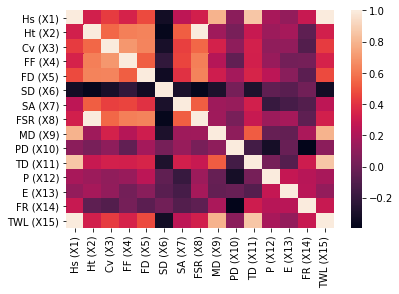

In [3]:
corr = X.corr()
import seaborn as sns
sns.heatmap(corr)
corr.shape

In [4]:
col = np.full((15),True, dtype="bool")
print(col)
flag = 0
if flag==0:
    for i in range(12):
        for j in range(i+1,12):
            if abs(corr.iloc[i,j])>0.9:
                col[j] = False
    X = X.iloc[:,col]
    flag = 1
print(col)
X.head()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True]


,Hs (X1),Ht (X2),Cv (X3),FF (X4),FD (X5),SD (X6),SA (X7),MD (X9),PD (X10),TD (X11),P (X12),E (X13),FR (X14),TWL (X15)
0,0.005167,0.005284,0.348857,1.629222,403.767705,47.488970,19.439385,55.0,45.0,55.0,60.0,35.0,25.0,51.666667
1,0.004333,0.005024,0.117171,1.664610,124.369644,123.864539,20.786422,50.0,35.0,40.0,55.0,35.0,40.0,43.333333
2,0.004267,0.005127,0.136262,1.935838,124.369644,55.876283,32.456879,45.0,35.0,40.0,55.0,40.0,30.0,42.666667
3,0.004000,0.002459,0.092059,1.307856,124.567093,187.092365,17.082540,40.0,45.0,40.0,50.0,25.0,25.0,40.000000
4,0.005367,0.004437,0.713431,1.469699,493.786526,57.456780,32.922497,60.0,45.0,55.0,60.0,40.0,25.0,53.666667


In [5]:
y = np.array(y).reshape(-1,1)
scale = StandardScaler()
X = scale.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1120, 14) (280, 14) (1120, 1) (280, 1)


In [6]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_Pred = linreg.predict(X_test)

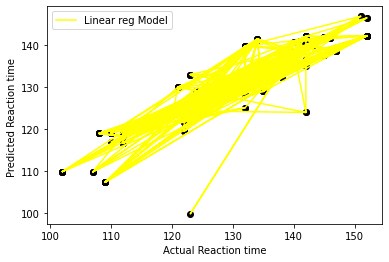

In [7]:
plt.scatter(y_test,y_Pred,color="black")
plt.plot(y_test,y_Pred,color="yellow",label = "Linear reg Model")
plt.xlabel("Actual Reaction time")
plt.ylabel("Predicted Reaction time ")
plt.legend()


In [8]:
linreg.score(X_test,y_test)

0.8114035313140626

In [9]:
r2_score(y_test,y_Pred)

0.8114035313140626

In [10]:
mean_squared_error(y_test,y_Pred)

29.886187183738937